# IMAGE CLASSIFICATION USING SVM

## IMPORTING THE LIBRARIES

In [107]:
import numpy as np
import matplotlib.pyplot as plt
import os
from keras.preprocessing import image
import warnings
warnings.filterwarnings('ignore')

In [108]:
from pathlib import Path

In [109]:
p = Path("Datasets/Images/images/")

dirs = p.glob("*")

label_dict = {"cat" : 0,
              "dog" : 1,
              "horse" : 2,
              "human" : 3}

image_data = []
labels = []

for folder in dirs:
    label = str(folder).split("\\")[-1][:-1]
    
    for img_path in folder.glob("*.jpg"):
        img = image.load_img(img_path, target_size=(32, 32))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(label_dict[label])

In [110]:
print(len(image_data))
len(labels)

808


808

In [111]:
image_data = np.array(image_data,dtype='float32')/255.0
labels = np.array(labels)

print(image_data.shape,labels.shape)

(808, 32, 32, 3) (808,)


## RANDOM SHUFFLING

In [112]:
import random

combined = list(zip(image_data, labels))
random.shuffle(combined)

image_data[:], labels[:]  = zip(*combined)

## VISUALIZING 

In [113]:
def drawImg(img):
    plt.imshow(img)
    plt.axis('off')
    plt.show()

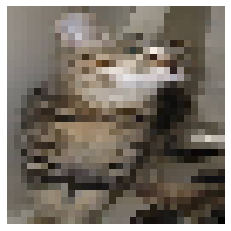

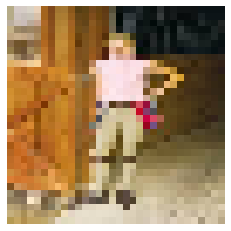

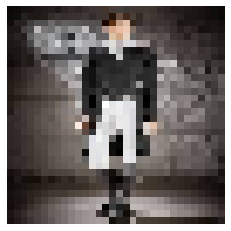

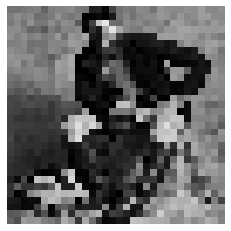

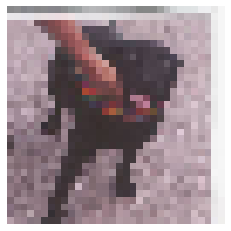

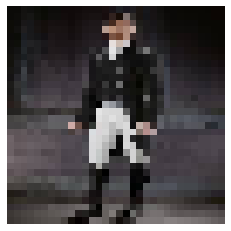

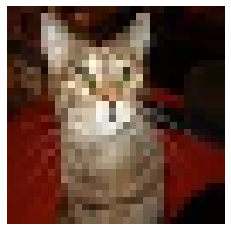

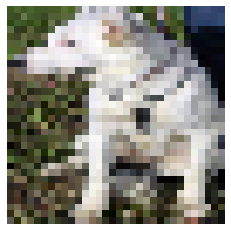

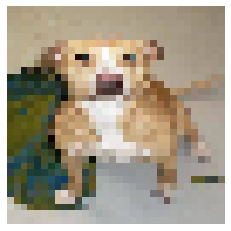

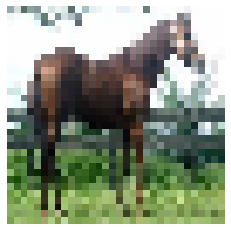

In [114]:
for i in range(10):
    drawImg(image_data[i])

## Flattening the image_data 

In [115]:
M = image_data.shape[0]
image_data = image_data.reshape(M, -1)

In [116]:
print(image_data.shape)
print(labels.shape)

(808, 3072)
(808,)


In [137]:
image_data.shape

(1, 808, 3072)

In [117]:
classess = len(np.unique(labels))

In [118]:
print(classess)

4


 ## TRANING THE SVM

In [120]:
from sklearn.svm import SVC
model = SVC(kernel="linear", C=1.0)
model.fit(image_data, labels)

SVC(kernel='linear')

In [121]:
model.score(image_data, labels)

0.655940594059406

## PREDICTION

In [122]:
y_pred = model.predict(image_data)

In [123]:
print(y_pred)

[0 0 3 0 0 3 0 1 1 0 0 3 2 0 0 0 2 3 1 3 1 0 3 0 2 0 0 1 0 1 0 2 2 0 0 0 3
 0 0 0 0 0 0 0 2 0 0 1 2 0 0 0 0 2 3 2 2 0 1 1 3 2 0 0 0 2 0 0 0 0 2 2 0 0
 2 0 2 0 0 2 3 3 1 3 0 0 0 2 2 3 0 2 0 3 0 2 0 1 2 0 3 1 1 2 2 1 2 2 0 0 0
 3 1 0 1 0 1 3 3 0 0 0 2 1 0 0 2 0 3 3 3 3 0 0 1 0 3 0 0 0 2 3 0 0 0 3 0 0
 3 0 0 3 3 0 2 1 2 2 2 1 3 0 0 1 0 1 0 2 2 2 2 2 2 1 0 3 1 0 3 2 3 0 1 2 1
 3 3 0 3 3 0 3 3 0 1 1 0 2 2 2 0 0 1 2 1 2 3 2 1 1 1 1 3 1 3 1 2 1 1 1 1 2
 3 1 3 1 3 1 0 1 1 0 0 2 2 2 2 1 0 1 3 1 0 1 2 2 1 1 1 2 1 2 1 1 1 2 1 3 1
 2 2 0 1 1 3 1 3 2 3 1 1 0 3 3 3 2 0 1 0 0 3 1 1 1 2 2 1 2 0 2 1 2 3 1 3 3
 1 2 3 1 2 1 0 3 2 3 3 1 1 1 3 3 2 0 0 3 3 3 1 2 3 3 0 1 3 3 2 2 2 0 1 1 3
 2 1 2 3 2 1 3 2 3 1 2 3 2 1 1 2 0 2 1 0 2 0 3 1 1 1 1 2 3 3 2 0 3 1 1 3 1
 3 1 2 1 2 3 0 2 1 2 3 2 1 3 2 2 2 2 1 2 1 1 1 3 3 3 1 2 1 3 1 3 0 2 2 3 2
 2 3 2 2 0 2 1 0 0 2 2 3 2 2 3 2 1 3 3 3 2 0 2 2 2 3 2 0 2 2 2 2 2 0 2 2 1
 2 3 3 1 0 3 1 2 2 2 3 2 2 2 2 2 2 3 2 3 1 3 3 3 1 2 3 2 2 2 0 2 2 2 3 3 1
 3 3 2 2 3 2 2 2 3 2 3 2 

In [153]:
for i in range(20):
    print(y_pred[i])
    if y_pred[i] == 0:
        print("It's a CAT!")
    elif y_pred[i] == 1:
        print("It's a DOG!")
    elif y_pred[i] == 2:
        print("It's a HORSE!")
    else:
        print("It's HUMAN!")

0
It's a CAT!
0
It's a CAT!
3
It's HUMAN!
0
It's a CAT!
0
It's a CAT!
3
It's HUMAN!
0
It's a CAT!
1
It's a DOG!
1
It's a DOG!
0
It's a CAT!
0
It's a CAT!
3
It's HUMAN!
2
It's a HORSE!
0
It's a CAT!
0
It's a CAT!
0
It's a CAT!
2
It's a HORSE!
3
It's HUMAN!
1
It's a DOG!
3
It's HUMAN!


## HENCE ALL THE FOUR CLASSESS ARE CLASSIFIED !